# **AI y Regresion Lineal**

#OBJETIVO:

Construir el modelo de aprendizaje automático más básico denominado **"Regresión Lineal"** y se implementá utilizando sólo NumPy de Python.

- En primer lugar, se tratará el conjunto de datos, a continuación, una descripción de un proceso general algoritmo de aprendizaje supervisado seguido por la representación de hipótesis, función de pérdida, y el algoritmo de descenso gradiente.

***Fuente***
- https://medium.com/analytics-vidhya/linear-regression-from-scratch-in-python-b6501f91c82d

In [ ]:
# Importing required libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Regresión lineal

- Se tiene un conjunto de datos con ***X (características)*** e ***y (etiquetas)*** y se quiere ajustar una línea recta.

- Supuesto: Se utilizará los siguientes datos como ejemplo motivador:
>- Suponer que un estudiante de Física desea saber cuánto puede sacar en el examen (sobre 100) dado el número de horas que estudia?

***Dataset:***
- https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537
- Datadaset ("data_notas.csv") ==> DATA ==>
- Hours,Scores
>- 2.5,21
>- 5.1,47
>- 3.2,27
>- 8.5,75
>- 3.5,30
>- 1.5,20
>- 9.2,88
>- 5.5,60
>- 8.3,81
>- 2.7,25
>- 7.7,85
>- 5.9,62
>- 4.5,41
>- 3.3,42
>- 1.1,17
>- 8.9,95
>- 2.5,30
>- 1.9,24
>- 6.1,67
>- 7.4,69
>- 2.7,30
>- 4.8,54
>- 3.8,35
>- 6.9,76
>- 7.8,86

In [ ]:
# Reading the csv file - Tabla de Horas y Scores.
df = pd.read_csv('/content/data_notas.csv')
# Displayinng the first five elements of the dataframe.
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#dfx = pd.DataFrame()

In [ ]:
#dfx['Hours'] = ['2.5', '5.1', '3.2', '8.5', '3.5', '1.5', '9.2', '5.5', '8.3', '2.7']
#dfx['Scores'] = ['21', '47', '27', '75', '30', '20', '88', '60', '81', '25']

- En estos datos "HOURS" es **X**(característica) (recuerde que sólo se tiene una característica en estos datos, es decir, horas, aunque puede haber múltiples características como cuántos problemas considere resolver para practicar, etc.).
- Las puntuaciones ("Scores") son **y** (etiquetas/objetivo) para cada ejemplo que se tenga.

- La siguiente figura visualiza el aspecto de los datos cuando los se presenta gráficamente.

In [ ]:
# Taking the Hours and Scores column of the dataframe as X and y
# respectively and coverting them to numpy arrays.
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores'])


In [ ]:
X.shape, y.shape

((25, 1), (25,))

Text(0, 0.5, 'y (Target) : Scores')

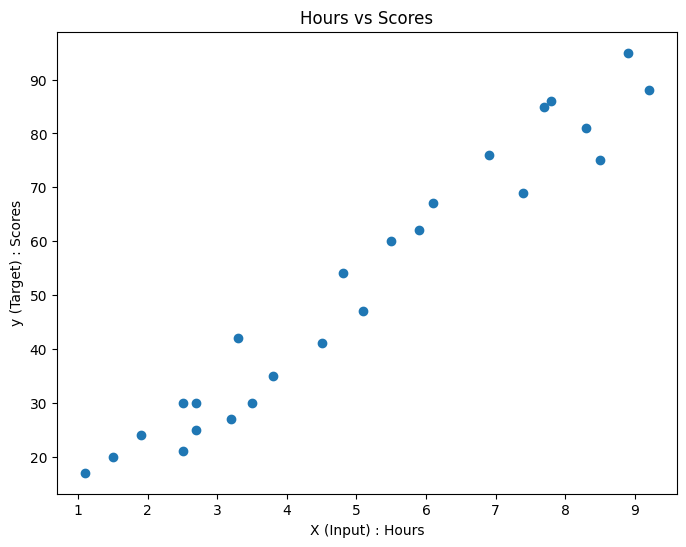

In [ ]:
# Plotting the data X(Hours) on x-axis and y(Scores) on y-axis
plt.figure(figsize=(8,6)) # figure size
plt.scatter(X, y)
plt.title('Hours vs Scores')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')

- En la regresión lineal, se desea ajustar una línea recta a datos como los anteriores.
- Después, se podrá predecir  puntuaciones ("scores") para cualquier número de horas que se desee.

- El proceso estándar para un algoritmo de Aprendizaje Supervisado es el siguiente -n Regresión Lineal, queremos ajustar una línea recta a datos como estos. Después, podremos predecir las puntuaciones para cualquier número de horas que queramos.

- El proceso estándar de un algoritmo de Aprendizaje Supervisado es el siguiente:

Figura: Supervised Learning algorithm process

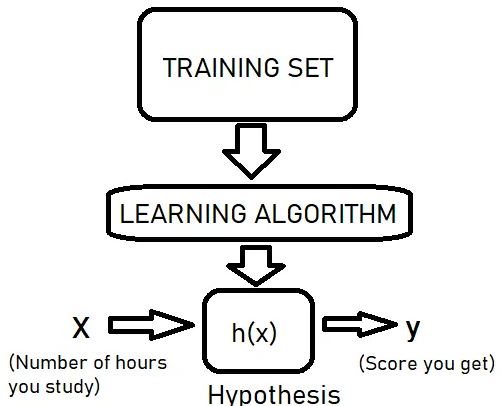

1. En primer lugar, se tiene un conjunto de entrenamiento (datos) como el de la tabla de Horas vs Scores.
2. Se alimentas este conjunto de entrenamiento al algoritmo de aprendizaje.
3. Se introduce este conjunto de entrenamiento en el algoritmo de aprendizaje.

NOTA:

- El trabajo del algoritmo de aprendizaje es generar una función h(x) o función de hipótesis que se utiliza para hacer predicciones (y: puntuación) para la entrada dada X (número de horas).

***La primera cuestión es cómo representar la hipótesis, h(x).***
- Cómo queremos una línea recta, diremos que nuestra hipótesis va a ser:

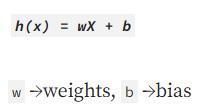

NOTA:
- En el código, se referiere a h(x) como **y_hat**:     y_hat = np.dot(X, weights) + bias

- Para el ejemplo anterior, se puede representar los datos en 2 dimensiones, por lo que puede decirse que pesos va a ser la pendiente de la recta y sesgo será la intersección y.
- Pero si se tuviera dos características en los datos en lugar de sólo una, entonces se representarían los datos en 3 dimensiones y se necesitaría un plano para ajustar los datos en el espacio tridimensional.
- Por tanto, la hipótesis será un plano en lugar de una línea recta.
- A medida que aumenta el número de características, aumentan las dimensiones de los pesos y sesgos.

- Los pesos y el sesgo son vectores y las dimensiones de **w y b **son iguales al número de características.
- Los pesos y el sesgo también se denominan parámetros del algoritmo de aprendizaje.

***==> El objetivo es encontrar los valores de pesos y sesgo tales que h(x) esté lo más cerca posible de y.- ***

Notaciones:

- n → number of features (1 in our example, which is Hours)
- m → number of training examples (25 in our example)

- X → Features

- y → labels/target

- (X(i), y(i)) → ith example in the Training set

***Representación de X, y, w y b ***

- X es una matriz de tamaño (m, n); las filas representan los ejemplos de entrenamiento y las columnas, las características.
- y es una matriz de tamaño (m, 1); cada fila es una etiqueta para el conjunto correspondiente de características en X.
- w es un vector de tamaño (n, 1), y el parámetro b es un escalar que puede ser emitido. Echa un vistazo a Broadcasting en NumPy

NOTA:
- Si se tuvieran 3 características y 3 ejemplos de entrenamiento, así es como se vería la representación (m=3, n=3):

Figura: Representación de X, w y b.

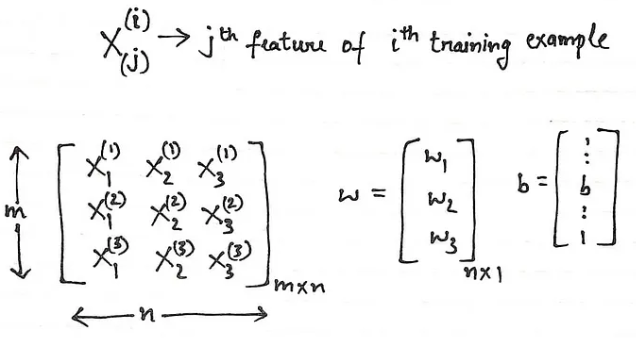

El subíndice es el i-ésimo ejemplo de entrenamiento y el superíndice es la j-ésima característica.

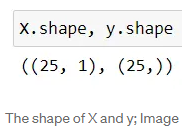



***La siguiente pregunta es cómo elegir los parámetros w y b. ***

- Así pues, se elije **w y b **de tal forma que h(x) sea lo más parecido posible a y.
- Así pues, lo que se desea es elegir parámetros tales que, al menos para las horas cuya puntuación conocemos, el algoritmo de aprendizaje produzca puntuaciones cercanas a las que se conoce en el conjunto de entrenamiento.

**Función de pérdida**

- Así, se define una función de pérdida como el error cuadrático medio:

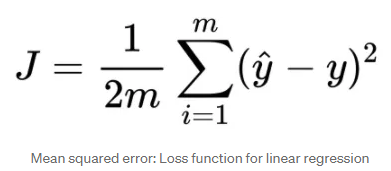

- Y se desea encontrar los valores de** w y b **que minimicen la función de pérdida.
- h(x) o **y_hat**es el valor que predice el algoritmo e **y** es el valor verdadero.
- La función de pérdida es una medida de lo cerca que se está del valor verdadero/objetivo o, en general, es una medida de lo bien que lo está haciendo el algoritmo.
- Cuanto menor sea la pérdida, mejor.

RECORDAR:
- el objetivo es encontrar pesos y sesgos que minimicen la función de pérdida.

La letra J o L se puede utilizar para representar la función de pérdida. Y la función de pérdida también se llama Función de Costo, estos términos se pueden utilizar indistintamente.

- La pregunta final es ***¿cómo minimizar la función de pérdida?***
- ==> Se hace mediante un algoritmo llamado Gradient Descent.

***Intuición para el Descenso Gradiente***

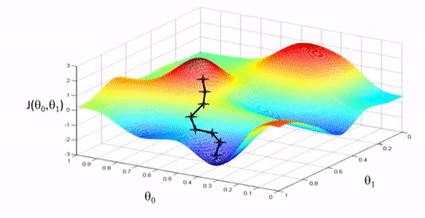

- Aquí theta0 es lo mismo que **bias** y **theta1** es lo mismo que **weights** .

- Digamos que se tiene una función de costo/pérdida J(theta0, theta1) y se desea encontrar valores para theta0 y theta1 que minimicen J .
- Entonces, en el descenso gradiente, se empieza en algún punto inicializando theta0 y theta1 aleatoriamente o al valor de todos ceros y lo que se hace es antes de dar cada paso. se "mira" los 360 grados a nuestro alrededor y se ve:
 >-  si fuéramos a dar un pequeño paso,
 >- en qué dirección deberíamos dar ese paso para ir cuesta abajo lo más rápido posible porque es el punto más bajo de la función donde encontraremos el mínimo J y así obtendremos los valores óptimos para theta0 y theta1 .

 - En cada paso, el descenso de gradiente buscará el paso cuesta abajo más empinado.

***Algoritmo de descenso de gradiente ***

Primero se inicializan los pesos y el sesgo aleatoriamente o un vector de todos ceros.

-# Initializing weights as a matrix of zeros of size: (number offeatures: n, 1) and bias as 0
- weights = np.zeros((n,1))
- bias = 0

- A continuación, se seguirá cambiando/actualizando los pesos y el sesgo para reducir la función de pérdida L.

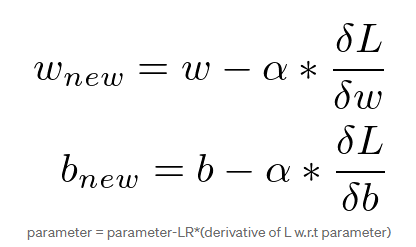

-# Actualización de los parámetros: parameter := parameter - lr*(derivative
-# of loss/cost w.r.t parameter)
- weights -= lr*dw
- bias -= lr*db

- lr o alfa→ Velocidad de aprendizaje. Determina cuán grande o pequeño es el paso que das mientras vas cuesta abajo.
- Una tasa de aprendizaje más baja significa pasos más pequeños y viceversa.

***Figura: Gradient Descent***

Esta figura muestra el parámetro **w** dando pasos cuesta abajo hasta alcanzar el mínimo de J. El **w** en el que J es mínimo es el **w óptimo** .

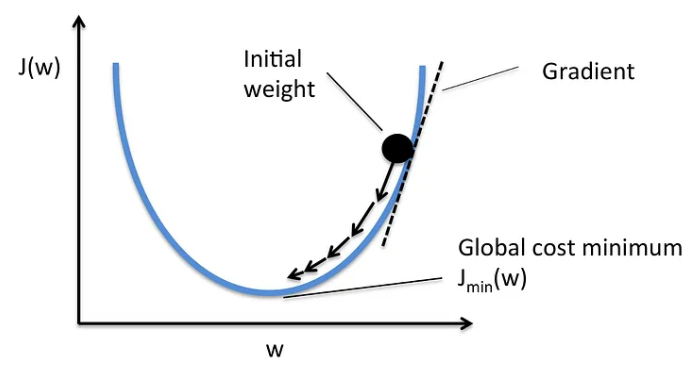

***Figura: Derivada Parcial de L***

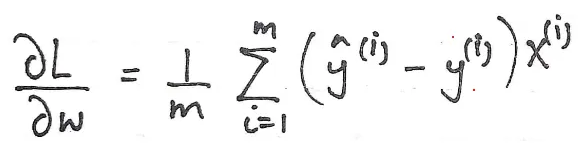

- ==> dw = (1/m)*np.dot(X.T, (y_hat - y))

***Figura: El gradiente/derivada del sesgo con respecto a Pérdida***

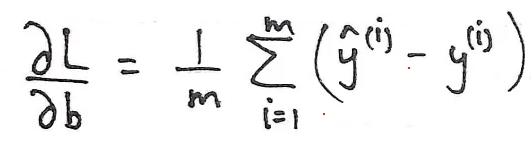

- ==> db = (1/m)*np.sum((y_hat - y))

- Si se sabe suficiente cálculo, se puedes tomar la derivada parcial de Loss (sustituye y_hat en loss) w.r.t parameters weights and bias, se obtendrá el mismo resultado.

***Resumen - Regresión lineal ***

 1. Primero, obtener los datos y sepárelos como X(características) e y(etiquetas).
 2. A continuación, inicializar los parámetros al azar o todos los ceros com este procedimiento:
     - weights = np.zeros((n,1))  # n: number of features
     - bias = 0


 3. Calcular lo siguente:

>- 1.Calcular y_hat o h(x)  ==> y_hat = np.dot(X, pesos) + vias
>- 2. Calcular los gradientes de pérdida (gradiant loss) respecto a los parámetros (pesos y bias).
>>- dw = (1/m)*np.dot(X.T, (y_hat - y))
>>- db = (1/m)*np.sum((y_hat - y))
>- 3. Actualizar los parámetros pesos y bias
>>- pesos = lr*dw
>>- bias = lr*db

>- 4. Repita los puntos anteriores. El número de veces que se repite es el número de pasos que se dan cuesta abajo. También se denomina epochs (o el número de iteraciones) en el aprendizaje automático.





#CLASE - Linear Regression

In [ ]:
# Linear Regression class
class LinReg:

    # Initializing lr: learning rate, epochs: no. of iterations, weights & bias: parameters as None
    # default lr: 0.01, epochs: 800

    def __init__(self, lr=0.01, epochs=800):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Training function: fit

    def fit(self, X, y):
        # shape of X: (number of training examples: m, number of
        # features: n)
        m, n = X.shape

        # Initializing weights as a matrix of zeros of size: (number of features: n, 1) and bias as 0

        self.weights = np.zeros((n,1))
        self.bias = 0

        # reshaping y as (m,1) in case your dataset initialized as (m,) which can cause problems

        y = y.reshape(m,1)

        # empty lsit to store losses so we can plot them later against epochs

        losses = []

        # Gradient Descent loop/ Training loop
        for epoch in range(self.epochs):

            # Calculating prediction: y_hat or h(x)
            y_hat = np.dot(X, self.weights) + self.bias

            # Calculting loss
            loss = np.mean((y_hat - y)**2)

            # Appending loss in list: losses
            losses.append(loss)

            # Calculating derivatives of parameters(weights, and bias)

            dw = (1/m)*np.dot(X.T, (y_hat - y))
            db = (1/m)*np.sum((y_hat - y))
   # Updating the parameters: parameter := parameter - lr*derivative of loss/cost w.r.t parameter)

            self.weights -= self.lr*dw
            self.bias -= self.lr*db

        # returning the parameter so we can look at them later
        return self.weights, self.bias, losses

    # Predicting(calculating y_hat with our updated weights) for the testing/validation

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

***Ahora se prueba la clase LinReg en el conjunto de datos.***

# ENTRENAMIENTO

In [ ]:
X_train, X_test, y_train, y_test = X[:20], X[20:], y[:20], y[20:]

model = LinReg(epochs=100)
w, b, l = model.fit(X_train,y_train)

#Resultado en Grafica

Text(0, 0.5, 'y (Target) : Scores')

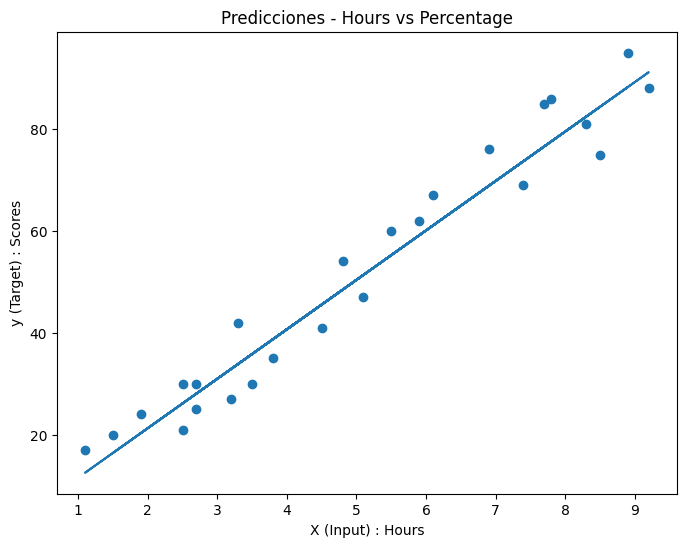

In [ ]:
# Plotting our predictions.
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, model.predict(X))  # X and predictions.
plt.title('Predicciones - Hours vs Percentage')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')

In [ ]:
#Predicting on the test set.
X_test_preds = model.predict(X_test)

X_test_preds

array([[28.05316177],
       [48.44669117],
       [38.73548669],
       [68.84022056],
       [77.58030459]])

#Comparación de los valores reales con las predicciones del modelo.

In [ ]:
Compare_df  = pd.DataFrame()
Compare_df ["actual"] = y_test
Compare_df ["Predicted"] = X_test_preds

Compare_df


,actual,Predicted
0,30,28.053162
1,54,48.446691
2,35,38.735487
3,76,68.840221
4,86,77.580305


#Loss vs epoch (número de iteraciones).

Text(0, 0.5, 'Loss / Cost')

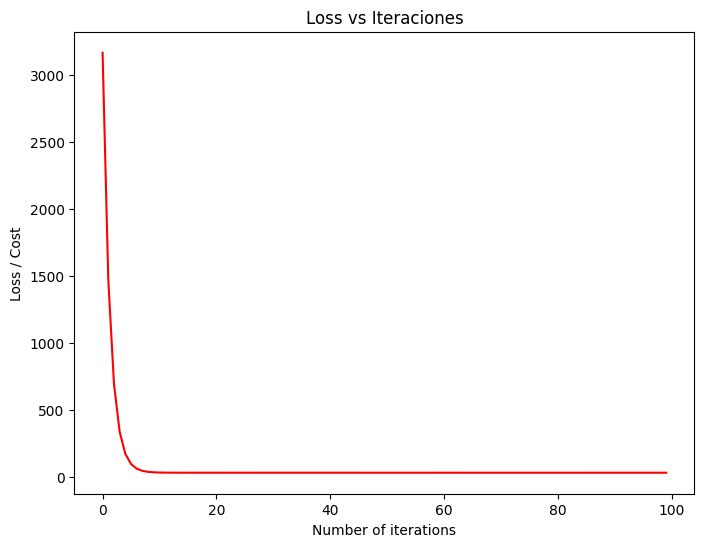

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(100)], l, 'r-')
plt.title('Loss vs Iteraciones')
plt.xlabel('Number of iterations')
plt.ylabel('Loss / Cost')

***ANALISIS:***

- Se visuializa que a medida que se da cada paso (epoch), la pérdida disminuye cada vez, lo que significa que el prcerso se está haciendo adecuadamente y que se va en la dirección correcta (es decir, cuesta abajo) en el desemnpeño de la función de pérdida.

***NOTA:***

- se aprecia que a medida que damos cada paso, la pérdida baja y baja, lo que significa que lo estamos haciendo bien y que vamos en la dirección correcta (es decir, cuesta abajo) en el paisaje de la función de pérdida.
- Homeworks: Experimentar con el código y probarlo con conjuntos de datos más grandes.

# **PARTE II: Regresión lineal ponderada localmente. Part 2**

Fuente:

- https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf

#OBJETIVO:

Implementar un Algoritmo de Aprendizaje No Paramétrico denominado Regresión Lineal Localmente Ponderada.

- En primer lugar, se verá la diferencia entre los algoritmos de aprendizaje paramétricos y no paramétricos.
-Posteriiormente, la comprensión de la función de ponderación, predecir la función, y,
- finalmente, trazar las predicciones utilizando Python NumPy y Matplotlib.

#ALCANCES:

Algoritmos de Aprendizaje Paramétricos vs No Paramétricos Paramétricos

***Algoritmo Paramétrico***

- En un Algoritmo Paramétrico, se tiene un conjunto fijo de parámetros como theta que se intenta encontrar (el valor óptimo) mientras se entrenan los datos.
- Después de haber encontrado los valores óptimos para estos parámetros, se puede obviar los datos o borrarlos y sólo utilizar el modelo con parámetros para hacer predicciones.
- Recordar que el modelo es sólo una función.

***No Paramétrico***

-En un Algoritmo No Paramétrico, siempre hay que mantener los datos y los parámetros en la memoria para hacer predicciones.
- Es por ello que este tipo de algoritmo puede no ser muy bueno si se tiene un conjunto de datos realmente muy masivo.

#Regresión lineal ponderada localmente

 Se utilizará los siguientes datos generados aleatoriamente como ejemplo motivador para entender la regresión lineal ponderada localmente.

**Considerar el siguiente gráfico (con datos aleatorios)**

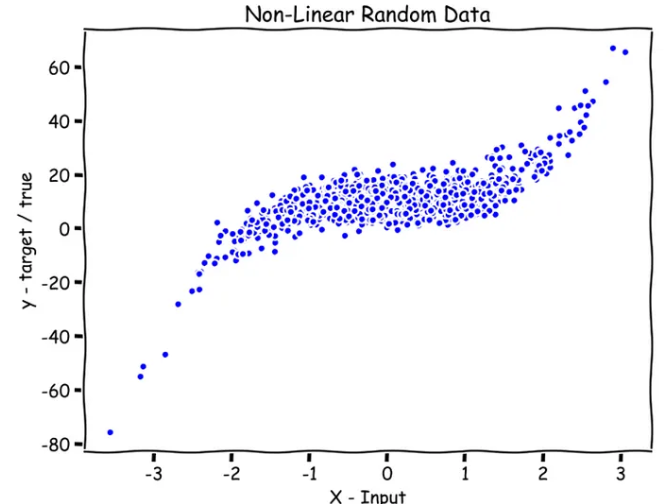

En la regresión lineal se ajustaría una línea recta a estos datos, pero eso no funcionará aquí porque los datos no son lineales y las predicciones acabarían teniendo grandes errores.

Se necesita ajustar una línea curva para minimizar el error.

***Notaciones***
- n → número de características (1 en nuestro ejemplo)
- m → número de ejemplos de entrenamiento (1000 en nuestro ejemplo)
- X(mayúsculas) → características
- y → secuencia de salida
- x (minúsculas)→ Punto en el que se quiere hacer la predicción. Referido como "point" en el código.
- x(i) → ith ejemplo de entrenamiento  

En la regresión lineal ponderada localmente, se entrega al modelo la x en la que se quiere hacer la predicción, entonces el modelo da a todas las x(i) alrededor de esa x un peso mayor cercano a uno, y el resto de x(i) reciben un peso menor cercano a cero y entonces intenta ajustar una línea recta a los datos de esa x(i) ponderada.

Esto significa que si se desea hacer una predicción para el punto verde del eje x (véase la Figura siguiente), el modelo da más peso a los datos de entrada, es decir, a las x(i) que están cerca o alrededor del círculo sobre el punto verde, y todas las demás x(i) reciben un peso cercano a cero, lo que hace que el modelo ajuste una línea recta sólo a los datos que están cerca o alrededor del círculo. Lo mismo ocurre con los puntos morado, amarillo y gris del eje x.

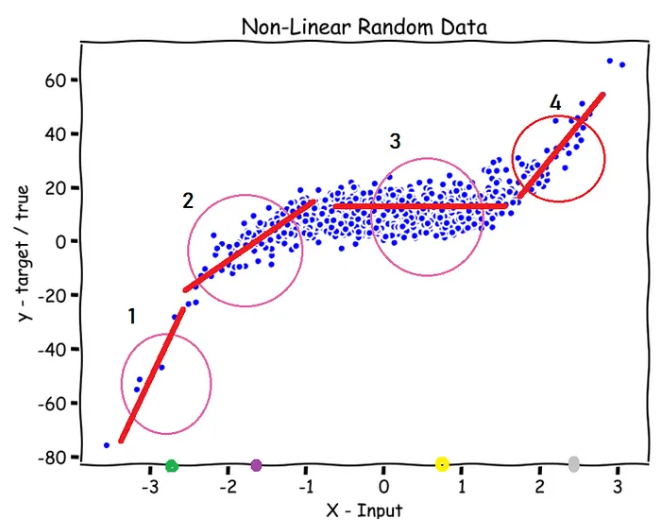

***PREGUNTAS:***

1. ¿Cómo asignar los pesos?
2. ¿Qué tamaño debe tener el círculo?

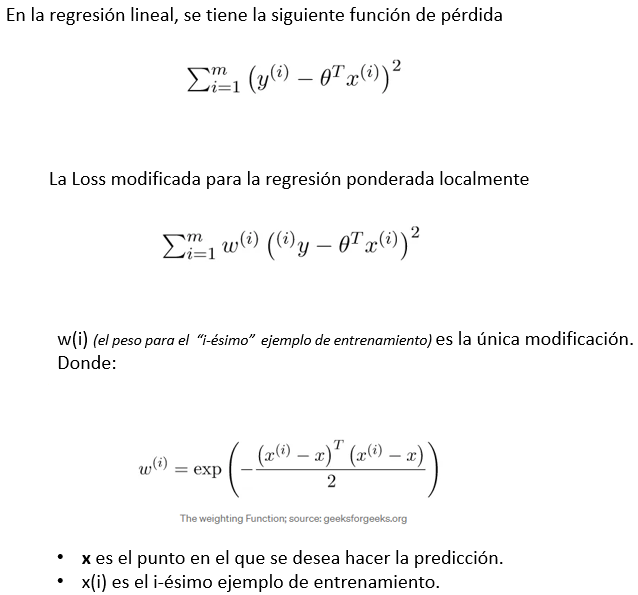

**El valor de esta función está siempre entre 0 y 1.**

Por lo tanto, si nos fijamos en la función, vemos que

- Si |x(i)-x| es pequeño, w(i) se acerca a 1.
- Si |x(i)-x| es grande, w(i) se acerca a 0.

Las x(i) que están lejos de x obtienen w(i) cercano a cero y las que están cerca de x, obtienen w(i) cercano a 1.

En la función de pérdida, esto se traduce en que los términos de error de las x(i) que están lejos de x se multiplican casi por cero y los de las x(i) que están cerca de x se multiplican casi por 1.

En resumen, sólo se suman los términos de error de las x(i) que están cerca de x.

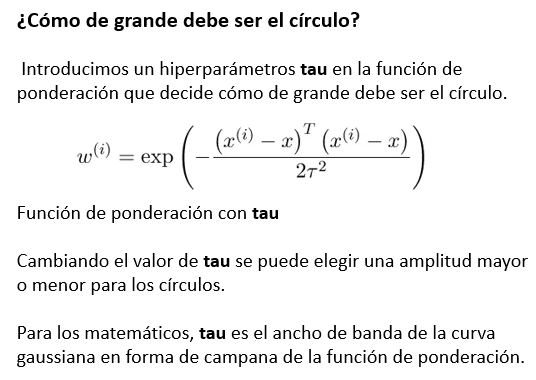

#ALGORITMO

En realidad, existe una solución de forma cerrada para este algoritmo, lo que significa que no se tiene que entrenar el modelo, se puede calcular directamente el parámetro theta utilizando la siguiente fórmula.

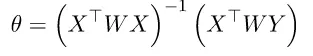

**¿Cómo calcular theta?**

Basta con tomar la derivada parcial de la función de pérdida modificada con respecto a theta y hacerla igual a cero.

HOMEWORK:
- Aplicar algo de álgebra lineal para obtener el valor de theta.

Ref: Solución de forma cerrada para la regresión lineal ponderada localmente (https://dsplog.com/2012/02/05/weighted-least-squares-and-locally-weighted-linear-regression/)

Y después de calcular theta, se puefe utilizar la siguiente fórmula para predecir.



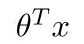

In [ ]:
import numpy as np
np.random.seed(8)
X = np.random.randn(1000,1)
y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)

In [ ]:
# Weight Matrix in code. It is a diagonal matrix.
def wm(point, X, tau):

  # tau --> bandwidth
  # X --> Training data.
  # point --> the x where we want to make the prediction.

  # m is the No of training examples .
    m = X.shape[0]

  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m))

  # Calculating weights for all training examples [x(i)'s].
    for i in range(m):
        xi = X[i]
        d = (-2 * tau * tau)
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d)

    return w

#Predict function.

In [ ]:
def predict(X, y, point, tau):

   # m = number of training examples.
    m = X.shape[0]

   # Appending a cloumn of ones in X to add the bias term.
## # Just one parameter: theta, that's why adding a column of ones        #### to X and also adding a 1 for the point where we want to          #### predict.
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1)

   # point is the x where we want to make the prediction.
    point_ = np.array([point, 1])

   # Calculating the weight matrix using the wm function we wrote      #  # earlier.
    w = wm(point_, X_, tau)

  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y))

  # Calculating predictions.
    pred = np.dot(point_, theta)

   # Returning the theta and predictions
    return theta, pred

#Plotting Predictions

In [ ]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data.
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to
   # predict.
   # tau --> the bandwidth.
    # The values for which we are going to predict.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval)

   # Empty list for storing predictions.
    preds = []

   # Predicting for all nval values and storing them in preds.
    for point in X_test:
        theta, pred = predict(X, y, point, tau)
        preds.append(pred)

   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)

   # Plotting
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()


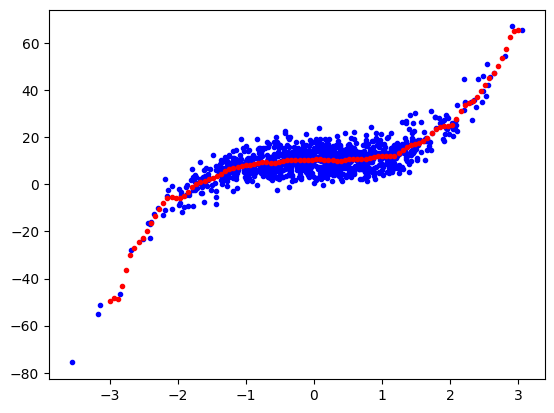

In [ ]:
plot_predictions(X, y, 0.08, 100)

NOTA:
- Los puntos rojos son las predicciones para 100 números espaciados uniformemente entre -3 y 3.

- Homeworks:
1. Se ve bastante bien. Experimentar con el valor de tau .
2. ¿Cuándo utilizar la regresión lineal ponderada localmente?
- => Cuando n (número de características) es pequeño. Si no quiere pensar en qué características utilizar.

#PARTE III: Regresión polinómica desde cero. Part 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.rand(1000,1)
y = 5*((X)**(2)) + np.random.rand(1000,1)

In [ ]:
def loss(y, y_hat):

    # y --> true/target value.
    # y_hat --> hypothesis

    #Calculating loss.
    loss = np.mean((y_hat - y)**2)
    return loss

In [ ]:
# Calulating gradient of loss w.r.t parameters(weights and bias).
def gradients(X, y, y_hat):

    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis
    # w --> weights (parameter).
    # b --> bias (parameter).

    # m-> number of training examples.
    m = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))

    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y))

    return dw, db

In [ ]:
def x_transform(X, degrees):

    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.

    # making a copy of X.
    t = X.copy()

    # Appending columns of higher degrees to X.
    for i in degrees:
        X = np.append(X, t**i, axis=1)

    return X

In [ ]:
def train(X, y, bs, degrees, epochs, lr):

    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.

    # Adding features to input X.
    x = x_transform(X, degrees)

    # m-> number of training examples
    # n-> number of features
    m, n = x.shape

    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1)

    # Empty list to store losses.
    losses = []

    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]

            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters.
            w -= lr*dw
            b -= lr*db

        # Calculating loss and appending it in the list.
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses

In [ ]:
# Predicting function.
def predict(X, w, b, degrees):

    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    #degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.

    # Adding degrees to input X.
    x1 = x_transform(X, degrees)

    # Returning predictions.
    return np.dot(x1, w) + b

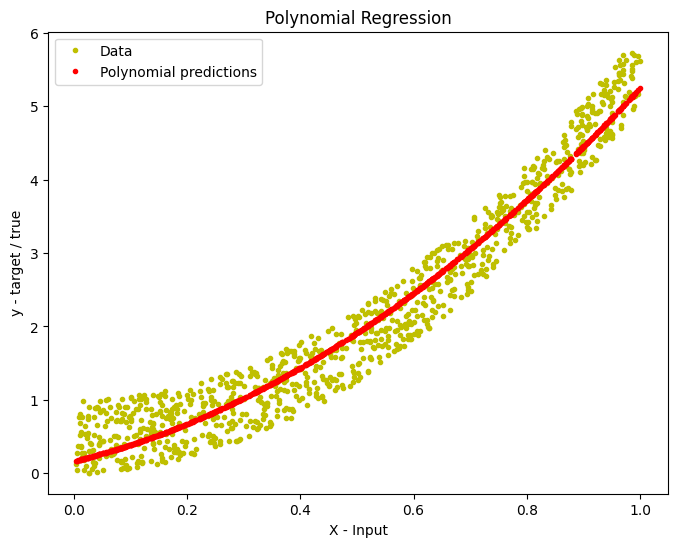

In [ ]:
w, b, l = train(X, y, bs=100, degrees=[2], epochs=1000,
                lr=0.01)
# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
def r2_score(y, y_hat):
    return 1 - (np.sum((np.array(y_hat)-np.array(y))**2)/
                np.sum((np.array(y)-np.mean(np.array(y)))**2))

#r2_score(y_train, predict(x_train, w, b, [2]))

r2_score(y, predict(X, w, b, [2]))

0.9551785719360419

***Notas:***
- https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/

\\#PARTE IV: Ecuación Normal en Python: La solución de forma cerrada para la regresión lineal. Part 4

Ref:
- https://towardsdatascience.com/normal-equation-in-python-the-closed-form-solution-for-linear-regression-13df33f9ad71

In [ ]:
import numpy as np
np.random.seed(42)
X = np.random.randn(500,1)
y = 2*X + 1 + 1.2*np.random.randn(500,1)
X.shape, y.shape

((500, 1), (500, 1))

In [ ]:
def find_theta(X, y):

    m = X.shape[0] # Number of training examples.
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)
    # reshaping y to (m,1)
    y = y.reshape(m,1)

    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

    return theta

In [ ]:
def predict(X):

    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)

    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)

    return preds

In [ ]:
# Getting the Value of theta using the find_theta function.
theta = find_theta(X, y)
theta


array([[1.90949642],
       [1.0388102 ]])

Text(0, 0.5, 'y - target / true')

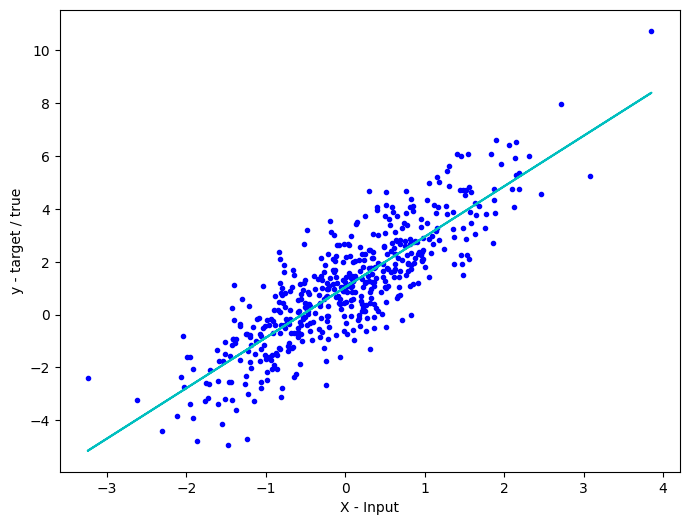

In [ ]:
# Getting the predictions on X using the predict function.
preds = predict(X)
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.plot(X, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - target / true')